
@Author:Girish<br>
@Date: 04-10-2024<br>
@Last modified by: Girish<br>
@Last modified Date:04-10-2024 <br>
@Title: Simple Linear Regression<br>

        Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


        Reading Data

In [2]:
training_data = pd.read_csv('train.csv')

## removing the null values

training_data.dropna(inplace=True)
training_data.isna().sum()

x    0
y    0
dtype: int64

In [15]:
testing_data = pd.read_csv('test.csv')
testing_data

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


         Preparing data for training and testing

In [4]:


X_train = training_data[['x']]
print(max(X_train['x']))
y_train = training_data['y']
y_train.isna().sum()

100.0


0

In [5]:
## preparing data for testing

X_test = testing_data[['x']]
y_test = testing_data['y']


        Outliers Handling

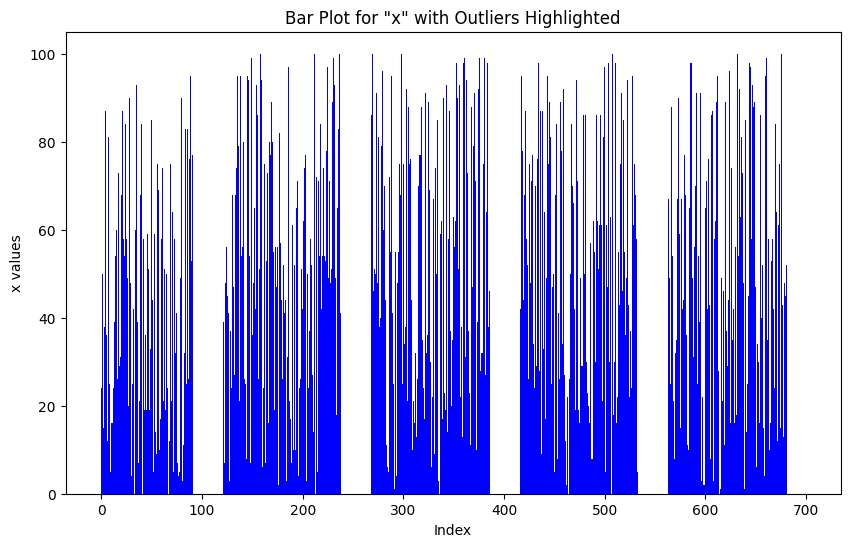

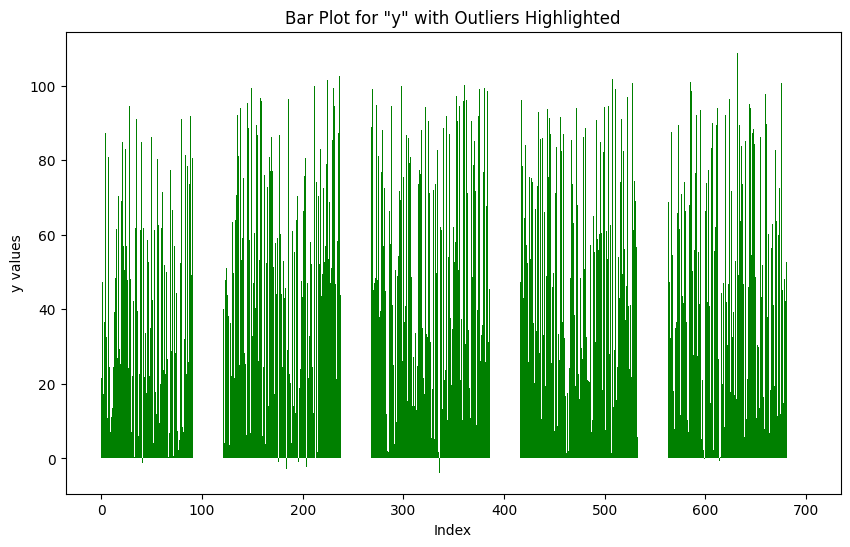

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calculate Z-scores
z_scores_x = np.abs(stats.zscore(X_train['x']))
z_scores_y = np.abs(stats.zscore(y_train))

# Set a threshold for identifying outliers (typically, Z > 3)
outliers_x = z_scores_x > 3
outliers_y = z_scores_y > 3

# Plot bar chart for 'x' with outliers highlighted
plt.figure(figsize=(10, 6))
colors_x = ['red' if outlier else 'blue' for outlier in outliers_x]
plt.bar(X_train.index, X_train['x'], color=colors_x)
plt.title('Bar Plot for "x" with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('x values')
plt.show()

# Plot bar chart for 'y' with outliers highlighted
plt.figure(figsize=(10, 6))
colors_y = ['red' if outlier else 'green' for outlier in outliers_y]
plt.bar(X_train.index, y_train, color=colors_y)
plt.title('Bar Plot for "y" with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('y values')
plt.show()


In [7]:
model = LinearRegression()

        Model Training

In [8]:
model.fit(X_train[['x']],y_train)

LinearRegression()

In [9]:
y_predict = model.predict(X_test[['x']])
y_predict

array([76.94327594, 20.90651855, 21.90717494, 19.90586217, 35.91636428,
       14.90258026, 61.93343021, 94.95509081, 19.90586217,  4.89601644,
        3.89536006, 18.90520579, 95.95574719, 61.93343021, 35.91636428,
       14.90258026, 64.93539936, 13.90192388, 86.94983976, 68.93802488,
       88.95115252, 50.92621001, 88.95115252, 26.91045685, 96.95640358,
       57.93080468, 78.9445887 , 20.90651855, 92.95377805, 26.91045685,
       98.95771634, 30.91308237, 32.91439514, 79.94524508, 27.91111323,
       46.92358448, 52.92752277, 68.93802488, 27.91111323, 32.91439514,
       90.95246528, 70.93933765, 49.92555363, 75.94261956,  3.89536006,
       36.91702066, 69.93868127, 67.9373685 , 39.91898981, 34.9157079 ,
       93.95443443, 87.95049614, 51.92686639, 30.91308237, 58.93146107,
       -0.10726546, 38.91833343, 63.93474297, 68.93802488, 56.9301483 ,
       12.9012675 , 71.93999403, 75.94261956, 60.93277383, 81.94655785,
       17.90454941, 40.91964619, 49.92555363, 54.92883554, 12.90

In [10]:
## Checking mean square error
mse = mean_squared_error(y_test,y_predict)


In [11]:
## cheking root mean square error
rmse = r2_score(y_test,y_predict)
rmse

0.9888014444327563

In [12]:
## Residual Analysis

residuals = y_test - y_predict

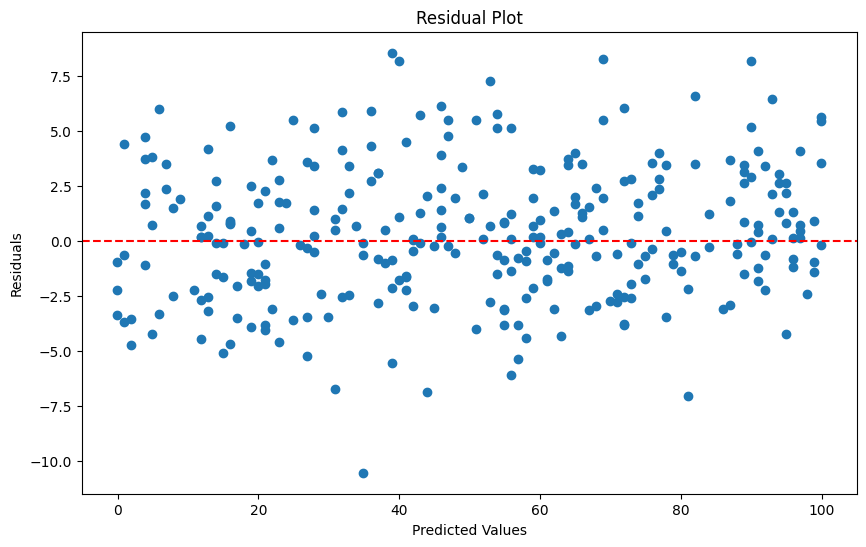

In [13]:
# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_predict, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

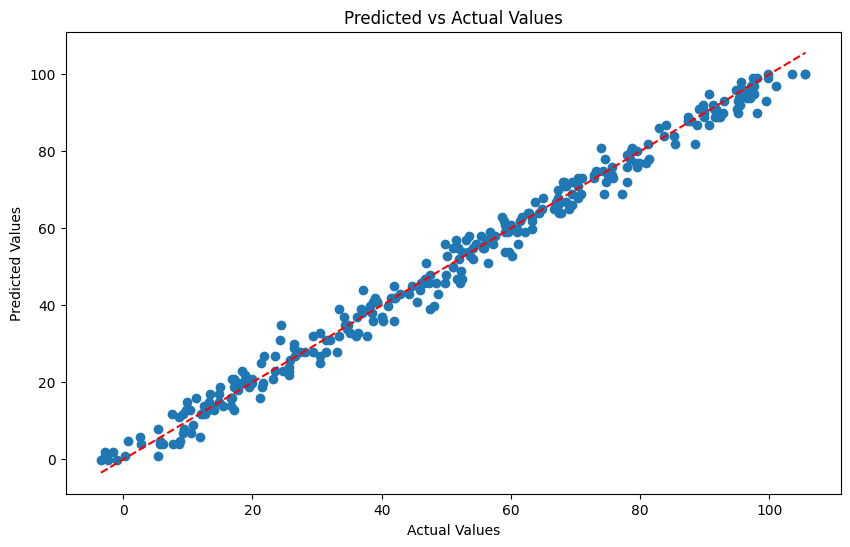

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')  # Identity line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()